In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [4]:
reader = easyocr.Reader(['en'])
result = reader.readtext("hello.PNG")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
result

[([[158, 74], [1034, 74], [1034, 226], [158, 226]],
  'Hello Worldl',
  0.9597610399898174)]

In [6]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

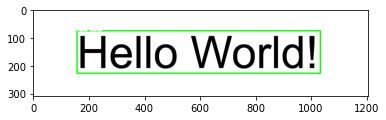

In [8]:
img = cv2.imread("hello.PNG")
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

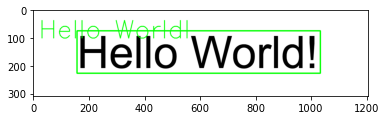

In [12]:
img = cv2.imread("hello.PNG")
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 3,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()

In [14]:
cap = cv2.VideoCapture(0)

while True:
    res, img = cap.read()
    img = cv2.imread("hello.PNG")
    result = reader.readtext(img)
    spacer = 100
    for detection in result: 
        top_left = tuple(detection[0][0])
        bottom_right = tuple(detection[0][2])
        text = detection[1]
        cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
        cv2.putText(img,text,(20,spacer), font, 3,(0,255,0),2,cv2.LINE_AA)
        spacer+=15

    cv2.imshow("Image", img)
    
    if(cv2.waitKey(1) == 27):
        break
        
cv2.destroyAllWindows()

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1274: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
